<a href="https://colab.research.google.com/github/vivek6311/Artificial-Intelligence-with-Python/blob/master/Encoder_Decoder_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Encoder-Decoder Network**

Encoder-Decoder consists of two structures: the encoder and the decoder. The encoder network downsamples the data into lower dimensions and the decoder network reconstructs the original data from the lower dimension representation. The lower dimension representation is usually called latent space representation.

![alt text](https://cdn-images-1.medium.com/max/1000/1*8ixTe1VHLsmKB3AquWdxpQ.png)

# Load Libraries

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from keras.models import Model
from keras.datasets import mnist

# Load Dataset in Numpy Format

MNIST is a simple computer vision dataset. It consists of images of handwritten digits. It also includes labels for each image, telling us which digit it is.
The MNIST data is split into three parts: 60,000 data points of training data, and 10,000 points of test data. Each image is 28 pixels by 28 pixels.


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


# Formatting Data for Keras

In [ ]:
# forcing the precision of the pixel values to be 32 bit
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

X_train = X_train[:,:,:,np.newaxis]
X_test = X_test[:,:,:,np.newaxis]

# Splitting Data into Training, and Validation

In [ ]:
from sklearn.model_selection import train_test_split

#Splitting the trining data into training and validation

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# Adding Noise to Images

Let's first define a noise factor which is a hyperparameter. The noise factor is multiplied with a random matrix that has a mean of 0.0 and standard deviation of 1.0. This matrix will draw samples from normal (Gaussian) distribution. The shape of the random normal array will be similar to the shape of the data you will be adding the noise.

In [ ]:
noise_factor = 0.2
x_train_noisy = X_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_valid_noisy = X_val + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_val.shape)
x_test_noisy = X_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_valid_noisy = np.clip(x_valid_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Visualizing the noisy images

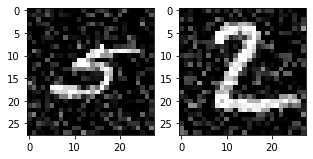

In [ ]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train_noisy[1], (28,28))
plt.imshow(curr_img, cmap='gray')

# Display the first image in testing data
plt.subplotplt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train_noisy[1], (28,28))
plt.imshow(curr_img, cmap='gray')

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test_noisy[1], (28,28))
plt.imshow(curr_img, cmap='gray')(122)
curr_img = np.reshape(x_test_noisy[1], (28,28))
plt.imshow(curr_img, cmap='gray')

# Denoising Encoder-Decoder Network

In [ ]:
epochs = 2

inChannel = 1

batch_size = 128

x, y = 28, 28

input_img = Input(shape = (x, y, inChannel))



def autoencoder(input_img):
    #encoder
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    #decoder
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool2)
    up1 = UpSampling2D((2,2))(conv4)
    conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
    up2 =  UpSampling2D((2,2))(conv5)
    conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(up2)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(conv5)
    return decoded

# Build the model and compile

In [ ]:
model = Model(input_img, autoencoder(input_img))
model.compile(loss='binary_crossentropy', optimizer = 'adam')

# Training

In [ ]:
model.save_weights("enc_dec.h5")
autoencoder_train = model.fit(x_train_noisy, X_train, validation_data=(x_valid_noisy, X_val), batch_size=batch_size,epochs=epochs)
model.save_weights("enc_dec.h5")

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
48000/48000 [==============================] - 151s 3ms/step - loss: 0.0858 - val_loss: 0.0815
Epoch 2/2
48000/48000 [==============================] - 151s 3ms/step - loss: 0.0801 - val_loss: 0.0783


# Train versus Validation Loss Plot

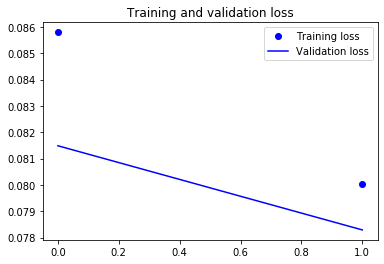

In [ ]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

# Predicting on Test dataset

In [ ]:
def autoencoder(input_img):
    #encoder
    conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

    #decoder
    conv4 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool2)
    up1 = UpSampling2D((2,2))(conv4)
    conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(up1)
    up2 =  UpSampling2D((2,2))(conv5)
    conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(up2)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(conv5)
    return decoded, conv1
model = Model(input_img, autoencoder(input_img))  
model.load_weights("enc_dec.h5")  
pred, conv1 = model.predict(x_test_noisy)

Test Images


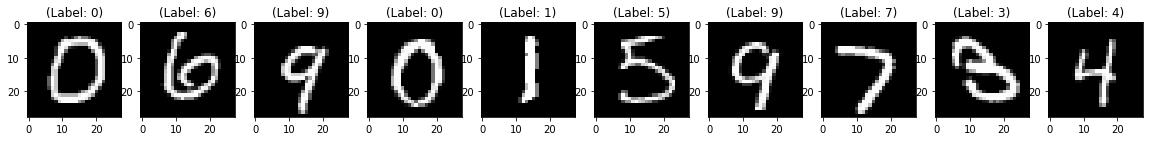

Test Images with Noise


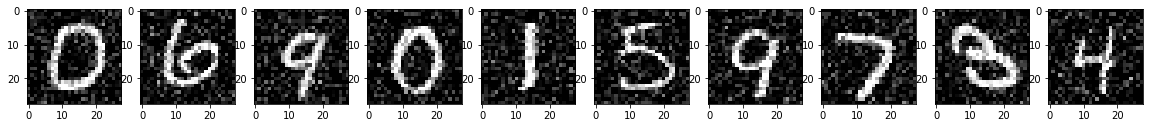

Reconstruction of Noisy Test Images


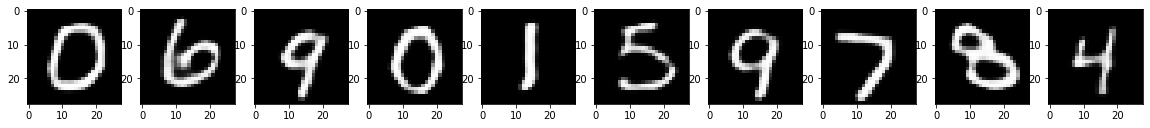

In [ ]:
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(X_test[i, ..., 0], cmap='gray')
    curr_lbl = y_test[i]
    plt.title("(Label: " + str(curr_lbl) + ")")
plt.show()    
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(x_test_noisy[i, ..., 0], cmap='gray')
plt.show()    

plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10,20,1):
    plt.subplot(2, 10, i+1)
    plt.imshow(pred[i, ..., 0], cmap='gray')  
plt.show()